In [1]:
from google.colab import drive


In [2]:
drive.mount('/gdrive', force_remount=True)
%cd /gdrive
%ls
%cd 'My Drive'/

Mounted at /gdrive
/gdrive
MyDrive/
/gdrive/My Drive


In [3]:
%ls

 A20201028048.pdf            message.txt
 A20201120035.pdf           'Numérisation document depuis FP040028 (1).pdf'
'Colab Notebooks'/          'Numérisation document depuis FP040028.pdf'
 datacamp/                  'Oral anglais.docx'
'Document sans titre.gdoc'   P1000755.JPG
'Exeat Camille (ENC).pdf'   'projet ingé'/
'groupes BDD.gsheet'        'Rapport 2.docx'
 matrix.zip                 'Résultas Bac Camille.pdf'
 message.gdoc               'tai grislin ngatchou.pptx'


In [4]:
%cd 'datacamp'

/gdrive/My Drive/datacamp


In [5]:
%ls

chest_xray/


In [6]:
%cd 'chest_xray'

/gdrive/My Drive/datacamp/chest_xray


In [7]:
%ls

model_ML.h5  test/  train/


In [8]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [9]:
train_path = 'train'
test_path = 'test'

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 5272 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


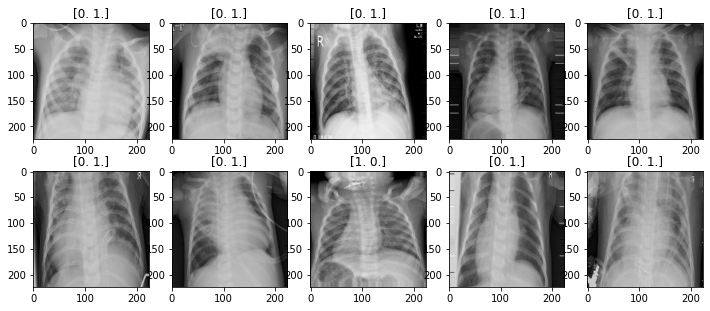

In [12]:
photos, labels = next(iter(train_generator))

plt.figure(figsize=(12, 5))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(photos[i])
  plt.title(labels[i])

In [13]:
test_images, test_labels = next(iter(test_generator))

In [14]:
bin_test_labels = test_labels[:, 0]

In [15]:
bin_test_labels

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
from keras.applications.vgg19 import VGG19

In [17]:
vgg19_model = VGG19(include_top=False, input_shape=(224, 224, 3))

In [18]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
for layer in vgg19_model.layers[:-6]:
  layer.trainable = False

In [20]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
for layer in vgg19_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f85b1c02890> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b2160790> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1bc7350> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f85b1bc7a50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1b30b90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1b30dd0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f85b1abc710> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1ac1b10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1acd6d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1ad9210> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1ad9fd0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f85b1acd290> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f85b1ae5a90> False
<keras.layers.convolut

In [22]:
model = Sequential()

In [23]:
model.add(vgg19_model)

In [24]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 45,717,570
Trainable params: 35,132,418
Non-trainable params: 10,585,152
_________________________________________________________________


In [26]:
model.compile(optimizer=Adam(lr=0.0001), loss=categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
history = model.fit_generator(train_generator, 
                    steps_per_epoch=10, 
                    validation_steps=10,
                    verbose=2,
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
10/10 - 97s - loss: 0.6436 - accuracy: 0.7600 - 97s/epoch - 10s/step
Epoch 2/10
10/10 - 89s - loss: 0.4348 - accuracy: 0.7700 - 89s/epoch - 9s/step
Epoch 3/10
10/10 - 89s - loss: 0.3026 - accuracy: 0.8400 - 89s/epoch - 9s/step
Epoch 4/10
10/10 - 88s - loss: 0.3888 - accuracy: 0.8700 - 88s/epoch - 9s/step
Epoch 5/10
10/10 - 93s - loss: 0.3280 - accuracy: 0.9000 - 93s/epoch - 9s/step
Epoch 6/10
10/10 - 87s - loss: 0.3317 - accuracy: 0.8800 - 87s/epoch - 9s/step
Epoch 7/10
10/10 - 87s - loss: 0.2407 - accuracy: 0.8900 - 87s/epoch - 9s/step
Epoch 8/10
10/10 - 87s - loss: 0.1975 - accuracy: 0.8700 - 87s/epoch - 9s/step
Epoch 9/10
10/10 - 92s - loss: 0.2390 - accuracy: 0.9000 - 92s/epoch - 9s/step
Epoch 10/10
10/10 - 88s - loss: 0.1409 - accuracy: 0.9500 - 88s/epoch - 9s/step


In [28]:
predictions = model.predict_generator(test_generator,
                                      steps=100,
                                      use_multiprocessing=True,
                                      verbose=1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


100/100 [==============================] - 669s 7s/step


In [30]:
model.evaluate(test_generator)

63/63 [==============================] - 428s 7s/step - loss: 0.2255 - accuracy: 0.9071


[0.2254534810781479, 0.9070512652397156]

In [32]:
model.save('model_ML.h5')